#### Evaluation Project - 1

   # Baseball Case Study

### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

#### -- Input features: 
Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

#### -- Output: 
Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

#### For downloading the dataset, use the link given below. 

Downlaod Files:

    https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

#### Getting data from csv file and converting it to dataframe 

In [2]:
baseball = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# Checking shape of our data(number of rows and columns)

baseball.shape

(30, 17)

In [4]:
# Checking if our data have any null values

baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
# Checking some more statsitical information of our data

baseball.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


### Observations
1. There is little chance that our data might not be correct.
2. Further need to explor our data using grapical representation to check skweness and outliers if any
3. As there are 17 coulumns we will also check which are the best one to go and proceed further
4. Also there is no need to change the datatype they are appropriate so we can skip the step.
5. Now, let’s visualize our dta using EDA and check if any preprocessing is required.

## DATA PREPROCESSING (ANALYSIS (EDA - EXPOLARTORY DATA ANALYSIS))

#### First checking and comparing our data using pair plot

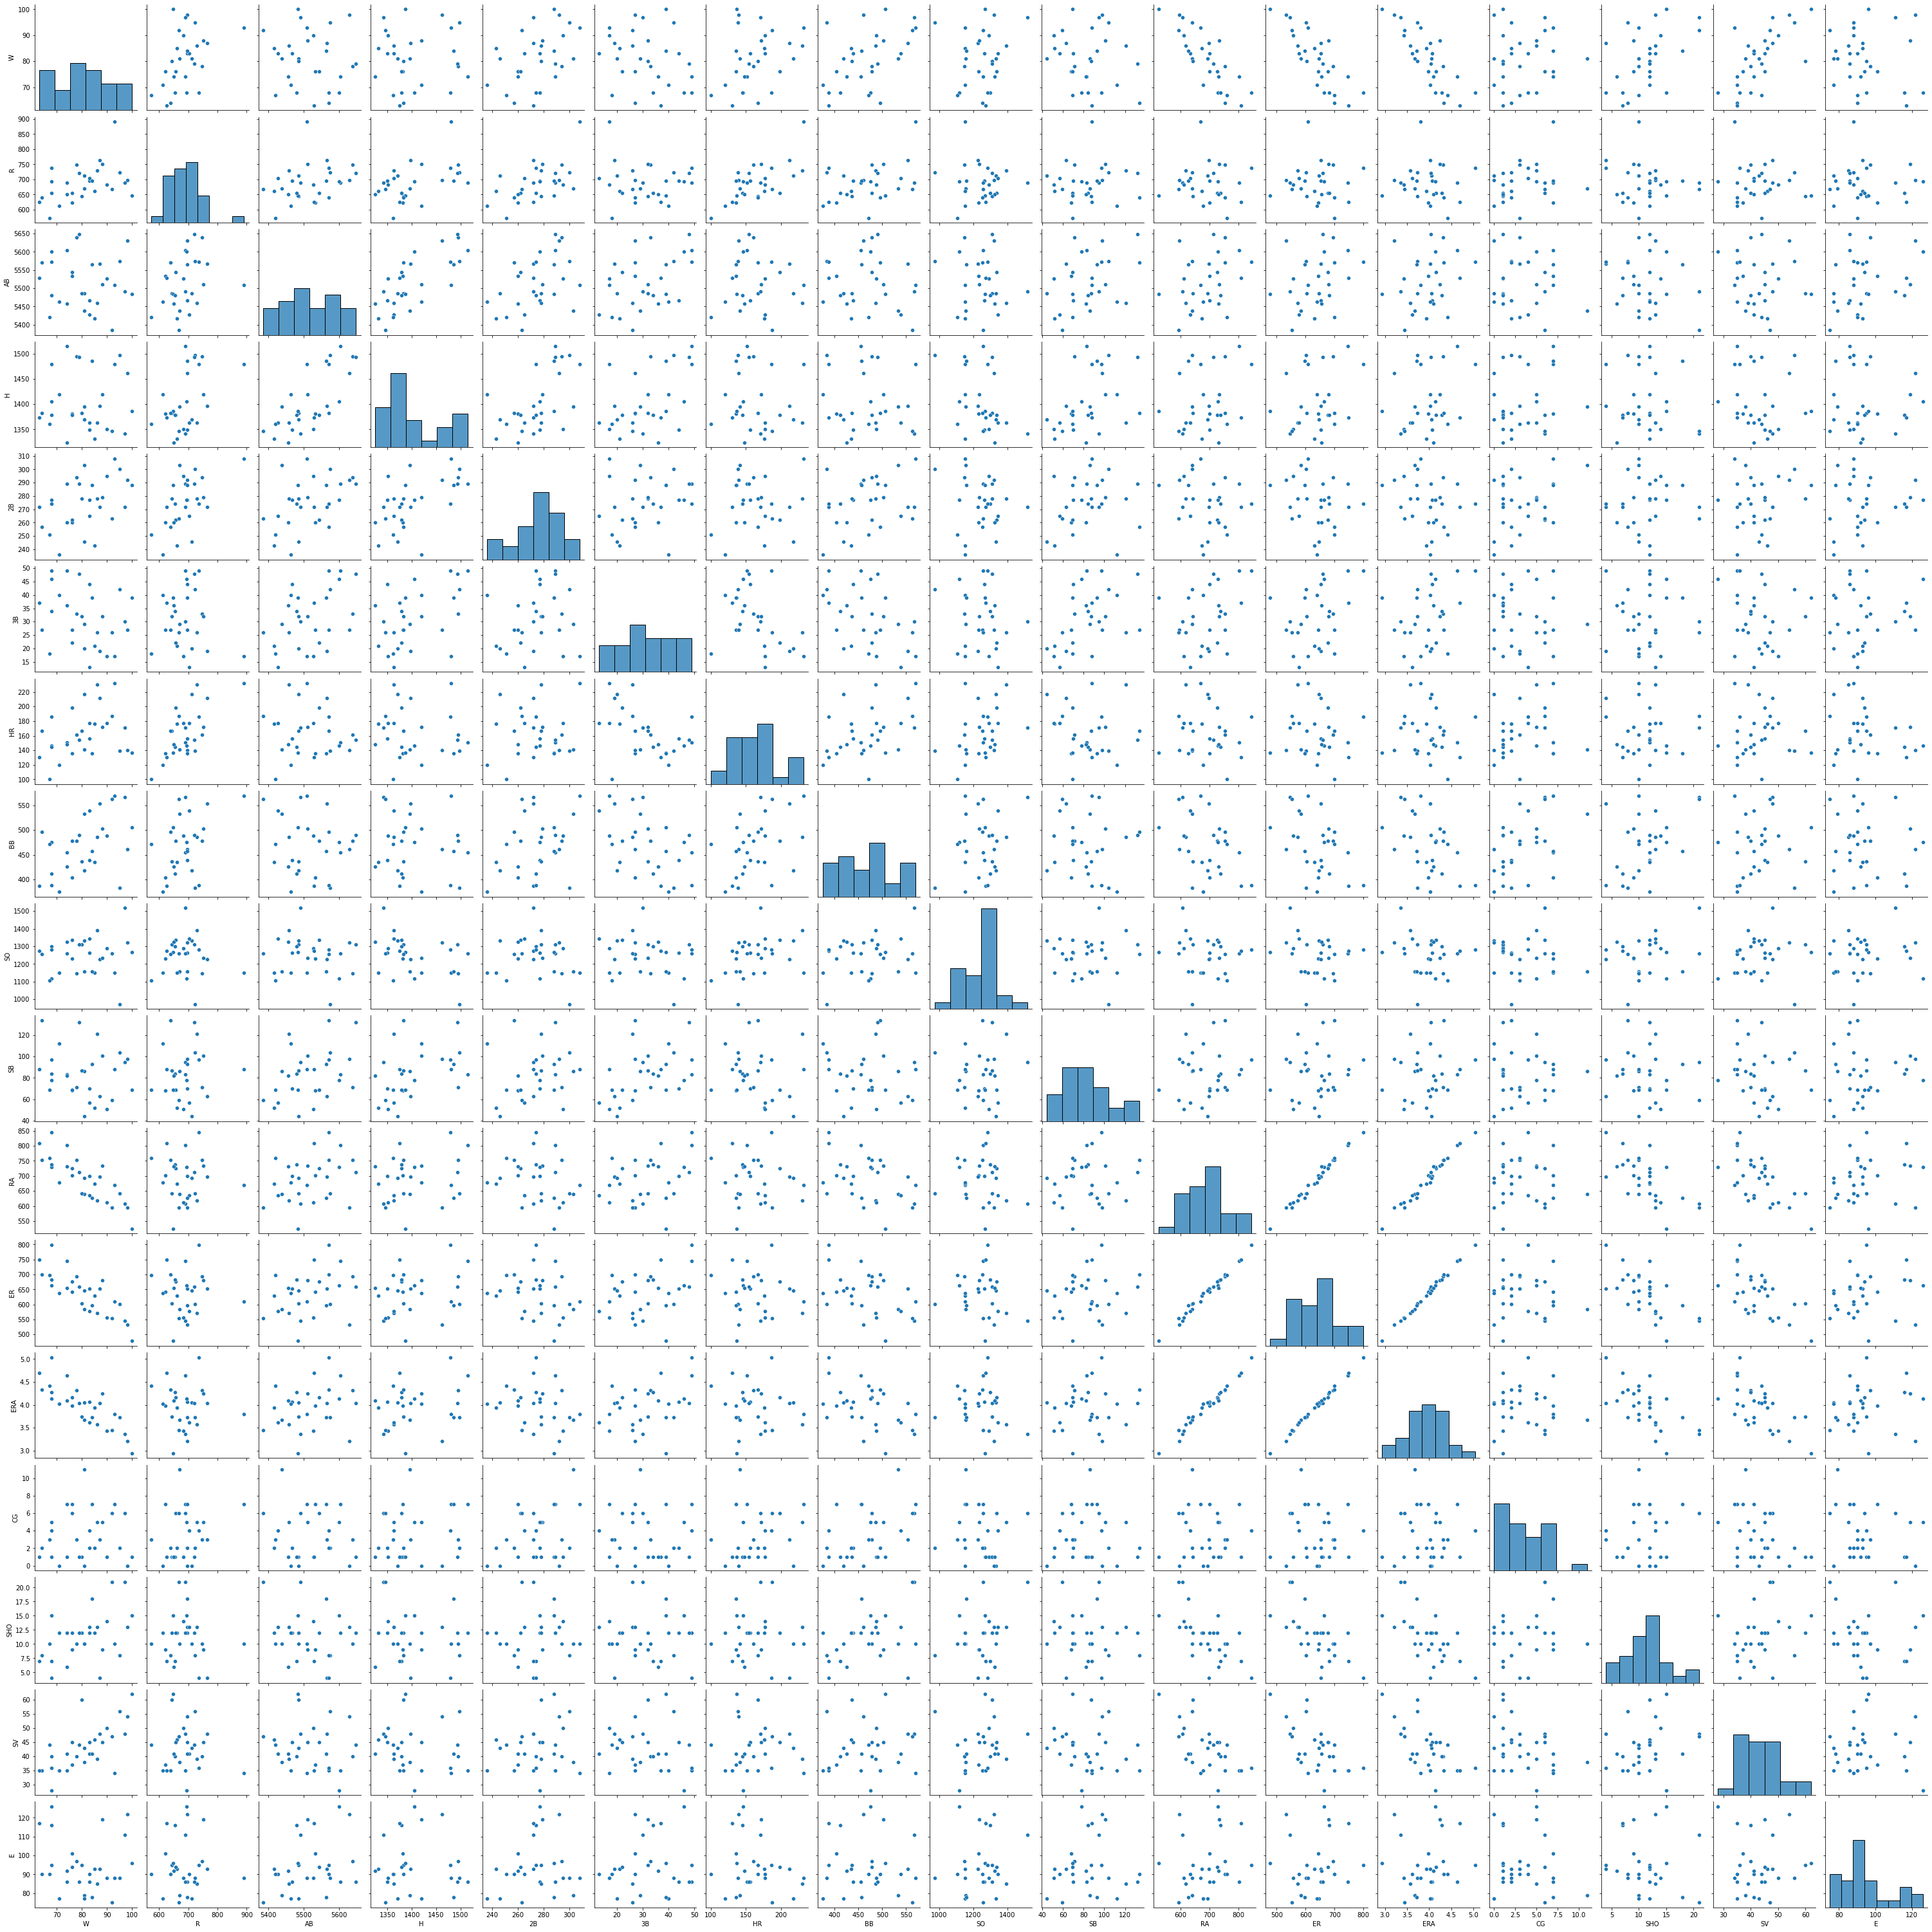

In [7]:
sns.pairplot(baseball)

### Observations

1. Comparing our data using paiplot.
2. To double check need to check how data is distributed column vise.
3. Using distribution plot we will can check how our data is distributed.
4. Lets see how data is distributed using visuvalization by using distplot.

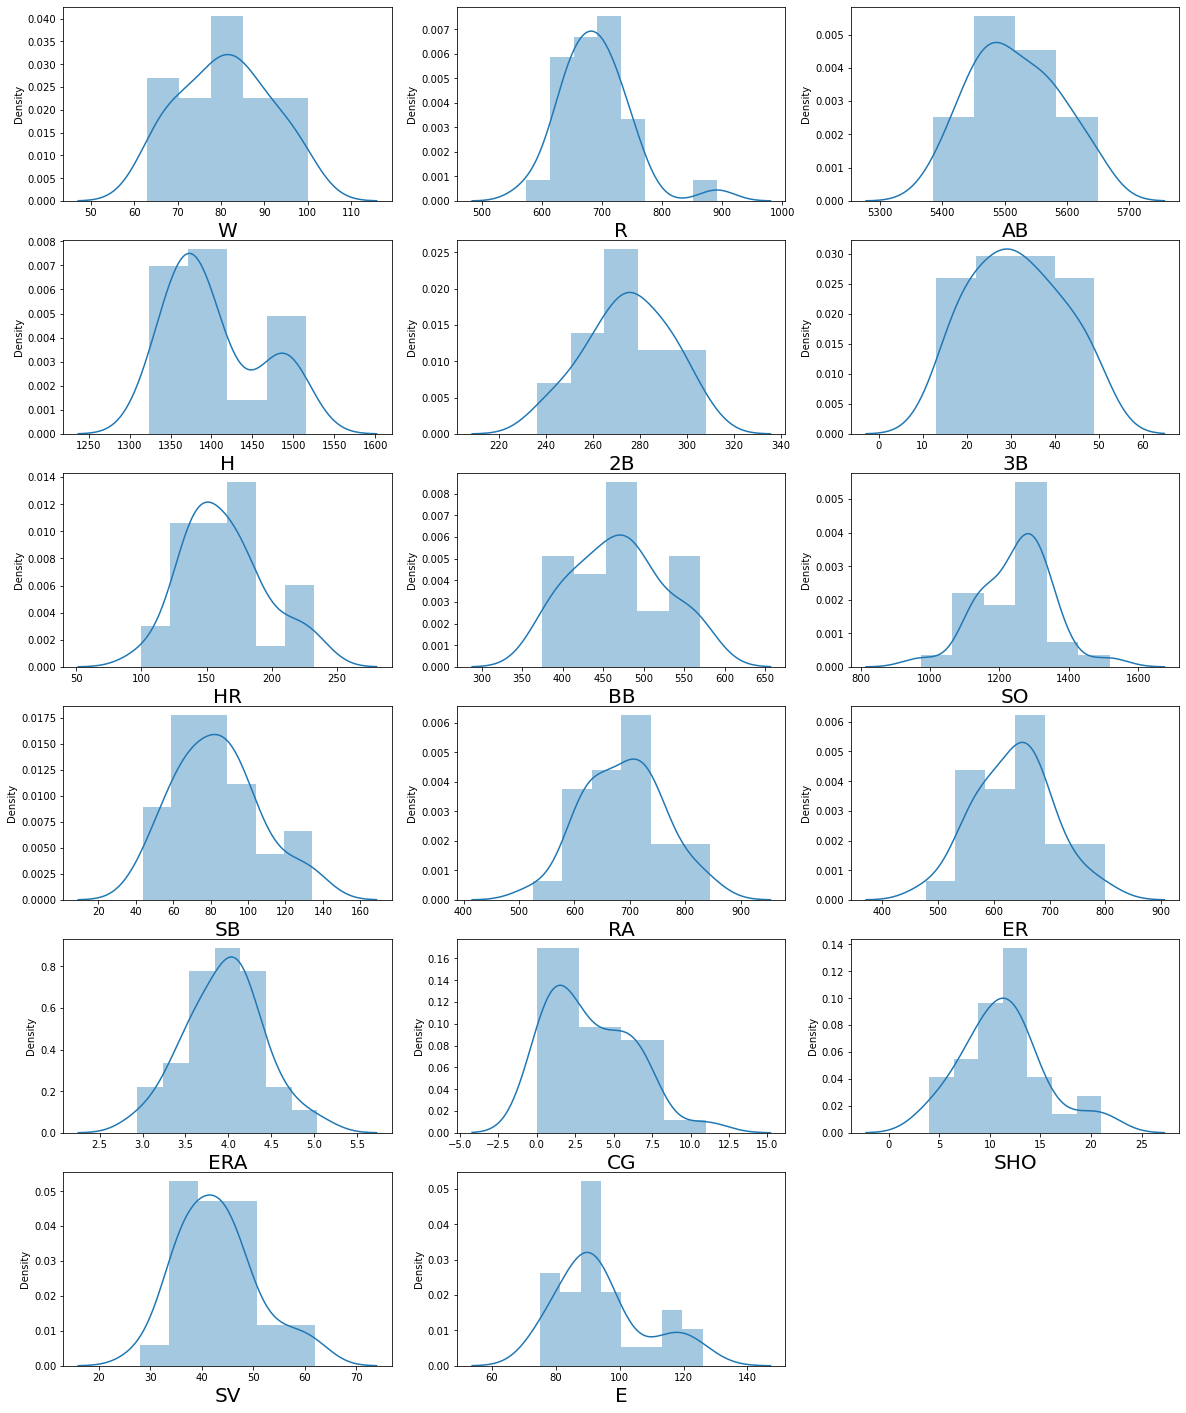

In [8]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN

plt.figure(figsize = (20,25))
plotnumber = 1

for column in baseball: 
    if plotnumber <= 17:
        ax = plt.subplot(6,3, plotnumber)
        sns.distplot (baseball[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

### Observations:
1. Skweness is present in our dataset. (There are some still outliers present in some of the columns)
2. Some of our data seems fine but there are chance that same might have outliers
3. We can check outliers by using box plot.
4. Then accordingly action can be taken to remove outliers if any.

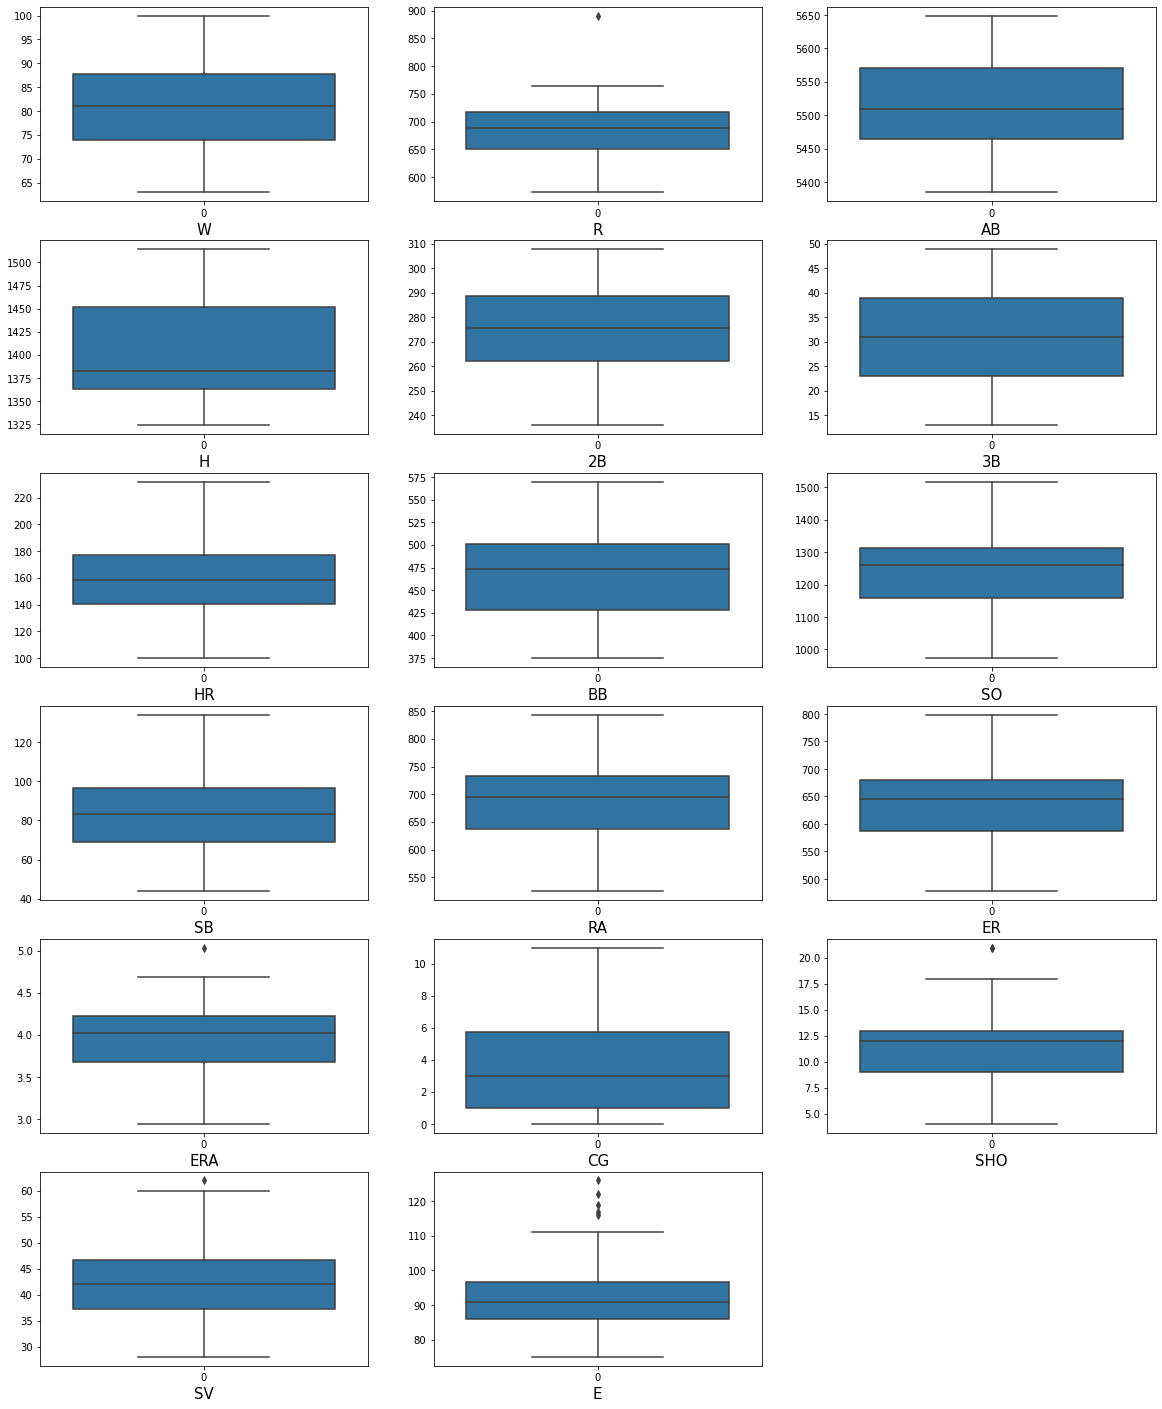

In [9]:
# Visualize the outliers using boxplot

plt.figure (figsize = (20,25), )
graph = 1
for column in baseball:
    if graph <= 17:
        plt.subplot(6,3, graph)
        ax = sns.boxplot (data = baseball[column])
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show ()

### Observations
1. Our 5 columns have outliers.(R, ERA, SHO, SV, E)
2.  out of this E has most number of outliers
3. We will use IQR method to remove outliers in our data set
4. First we will start with checking original shape of our data set

In [10]:
# check how many rows and colums are available in our data before remove outliers
baseball.shape

(30, 17)

There are 30 rows and 17 columns before remove outliers

#### Lets being by removing outliers using IQR (Interquartile range)

(Interquartile range) IQR is the range of values that resides in middle of the scores it uses percentile for outlier detection 50 percentile represents the median, 25 percentile represents the Q1, 75 percentile represents Q3.

#### Below is the formula for IQR

##### higher side ==> Q3 + (1.5 * IQR)
##### lower side ==> Q1 - (1.5 * IQR)


In [11]:
# Find the IQR (inter quatile range) to identityfy outliers

# 1st Quantile
q1 = baseball.quantile(0.25)

# 3rd Quantile 

q3 = baseball.quantile (0.75)

#IQR (inter quantile range)

iqr = q3 - q1

In [12]:
# Checking q3-q1 of our features

print (q1)
print ('-'* 50)
print (q3)
print ('-'* 50)
print (iqr)

W        74.0000
R       651.2500
AB     5464.0000
H      1363.0000
2B      262.2500
3B       23.0000
HR      140.2500
BB      428.2500
SO     1157.5000
SB       69.0000
RA      636.2500
ER      587.2500
ERA       3.6825
CG        1.0000
SHO       9.0000
SV       37.2500
E        86.0000
Name: 0.25, dtype: float64
--------------------------------------------------
W        87.75
R       718.25
AB     5570.00
H      1451.50
2B      288.75
3B       39.00
HR      177.00
BB      501.25
SO     1311.50
SB       96.50
RA      732.50
ER      679.25
ERA       4.22
CG        5.75
SHO      13.00
SV       46.75
E        96.75
Name: 0.75, dtype: float64
--------------------------------------------------
W       13.7500
R       67.0000
AB     106.0000
H       88.5000
2B      26.5000
3B      16.0000
HR      36.7500
BB      73.0000
SO     154.0000
SB      27.5000
RA      96.2500
ER      92.0000
ERA      0.5375
CG       4.7500
SHO      4.0000
SV       9.5000
E       10.7500
dtype: float64


In [13]:
# As R has ourlier we will check higher value using iqr forumla for higher side.

R_high = (q3.R + (1.5* iqr.R))
R_high

818.75

In [14]:
# Checking which index postion is our value from

index_Y = np.where(baseball['R']>R_high)
index_Y

(array([5], dtype=int64),)

In [15]:
# After remove checking how many data is remaining in our data set

baseball = baseball.drop(baseball.index[index_Y])
baseball.shape

(29, 17)

In [16]:
# Rearranging index position to correct our dataframe

baseball.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [17]:
# As ERA has ourlier we will check higher value using iqr forumla for higher side.

ERA_high = (q3.ERA + (1.5* iqr.ERA))
ERA_high

5.026250000000001

In [18]:
# Checking which index postion is our value from

index_Y = np.where(baseball['ERA']>ERA_high)
index_Y

(array([28], dtype=int64),)

In [19]:
# After remove checking how many data is remaining in our data set

baseball = baseball.drop(baseball.index[index_Y])
baseball.shape

(28, 17)

In [20]:
# Rearranging index position to correct our dataframe

baseball.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [21]:
# As SHO has ourlier we will check higher value using iqr forumla for higher side.


SHO_high = (q3.SHO + (1.5* iqr.SHO))
SHO_high

19.0

In [22]:
# Checking which index postion is our value from

index_Y = np.where(baseball['SHO']>SHO_high)
index_Y

(array([16, 24], dtype=int64),)

In [23]:
# After remove checking how many data is remaining in our data set

baseball = baseball.drop(baseball.index[index_Y])
baseball.shape

(26, 17)

In [24]:
# Rearranging index position to correct our dataframe

baseball.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [25]:
# SV has ourlier we will check higher value using iqr forumla for higher side.

SV_high = (q3.SV + (1.5* iqr.SV))
SV_high

61.0

In [26]:
# Checking which index postion is our value from

index_Y = np.where(baseball['SV']>SV_high)
index_Y

(array([14], dtype=int64),)

In [27]:
# After remove checking how many data is remaining in our data set

baseball = baseball.drop(baseball.index[index_Y])
baseball.shape

(25, 17)

In [28]:
# Rearranging index position to correct our dataframe

baseball.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [29]:
# E has ourlier we will check higher value using iqr forumla for higher side.

E_high = (q3.E + (1.5* iqr.E))
E_high

112.875

In [30]:
# Checking which index postion is our value from

index_Y = np.where(baseball['E']>E_high)
index_Y

(array([ 9, 13, 14, 15, 21], dtype=int64),)

In [31]:
# After remove checking how many data is remaining in our data set

baseball = baseball.drop(baseball.index[index_Y])
baseball.shape

(20, 17)

In [32]:
# Rearranging index position to correct our dataframe

baseball.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


In [33]:
# Re-indexing our final data

A = baseball.reset_index()

In [34]:
# Checking our data shape after removing outlier

baseball.shape

(20, 17)

We have now removed outliers from our columns

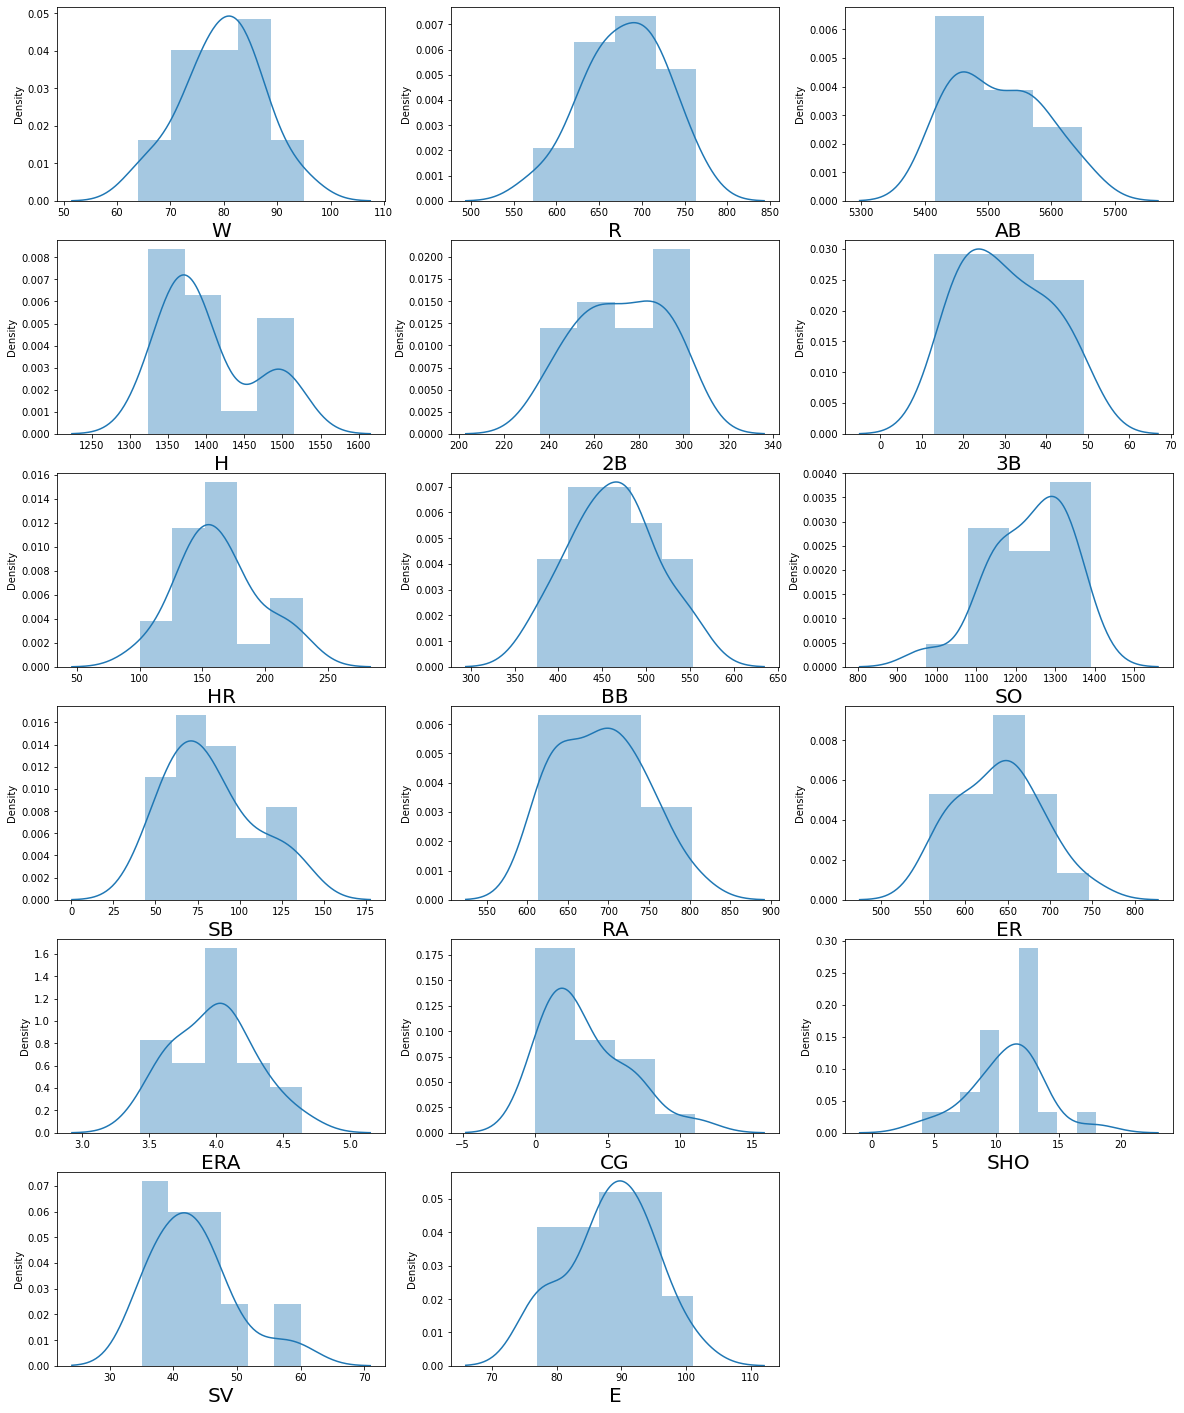

In [35]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in baseball:
    if plotnumber <= 17:
        ax = plt.subplot(6,3, plotnumber)
        sns.distplot (baseball[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

### Observation
1. Our data is now looking good after removing outliers
2. We will further check correlation between each column to W
3. As there are 17 column we can reduce the column size by using SelectKbest fetaure
4. This is give us best columns to predict our data

## Using SelectKBest feature Selection method
### This is to check if what are best features amoung our available columns

In [36]:
# Importing SlelectKBest feature from sklearn.feature_selection

from sklearn.feature_selection import SelectKBest, f_classif

In [37]:
# Lets being assigning data to x and y

x = baseball.drop('W', axis = 1)
y = baseball.W

In [38]:
# Selecting best features from our column
Best_feat = SelectKBest(score_func =f_classif, k = 16)

fit = Best_feat.fit(x,y)

# Getting scores

baseball_scores = pd.DataFrame(fit.scores_)

# creating dataframe of feature names
baseball_columns = pd.DataFrame(x.columns)

# Joining 2 dataframes using concatenate

feature_score = pd.concat([baseball_columns, baseball_scores], axis = 1)
feature_score.columns = ['Feature Names', 'Score']

# Finally checking top 10 features.
print (feature_score.nlargest(10, 'Score'))

   Feature Names     Score
0              R  4.765857
15             E  4.080000
8             SB  3.415345
14            SV  2.912719
9             RA  2.026253
1             AB  1.816023
7             SO  1.769528
13           SHO  1.733913
11           ERA  1.143385
10            ER  1.043160


In [39]:
# Assigning new features to new variable

new_baseball = A.drop(['index','H','2B', '3B', 'HR', 'BB', 'CG'] , axis = 1)
new_baseball

,W,R,AB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,973,104,641,601,3.73,8,56,88
1,83,696,5467,1264,70,700,653,4.07,12,45,86
2,81,669,5439,1157,86,640,584,3.67,10,38,79
3,76,622,5533,1231,68,701,643,3.98,9,37,101
4,74,689,5605,1259,83,803,746,4.64,12,35,86
5,87,764,5567,1227,63,698,652,4.03,4,48,93
6,81,713,5485,1331,44,693,646,4.05,10,43,77
7,80,644,5485,1310,87,642,604,3.74,12,60,95
8,78,748,5640,1148,71,753,694,4.31,10,40,97
9,86,729,5459,1392,121,618,572,3.57,13,39,85


#### Visualizing correlation between of target column with all new featuers

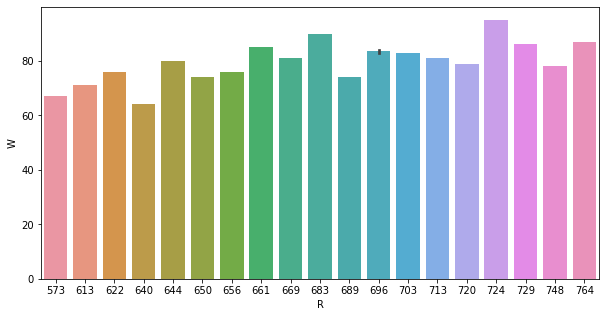

In [40]:
# Checking R with W

plot = plt.figure(figsize = (10,5))
sns.barplot(x= 'R', y= 'W', data = A)
plt.show()

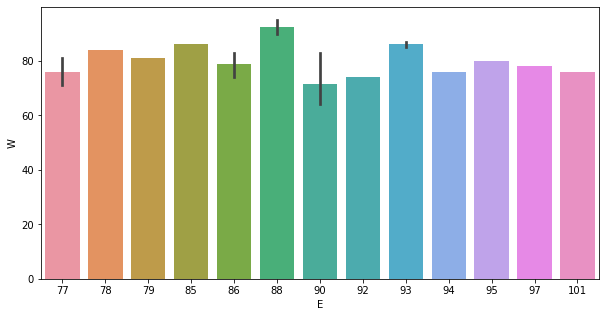

In [41]:
# Checking E with W

plot = plt.figure(figsize = (10,5))
sns.barplot(x= 'E', y= 'W', data = A)
plt.show()

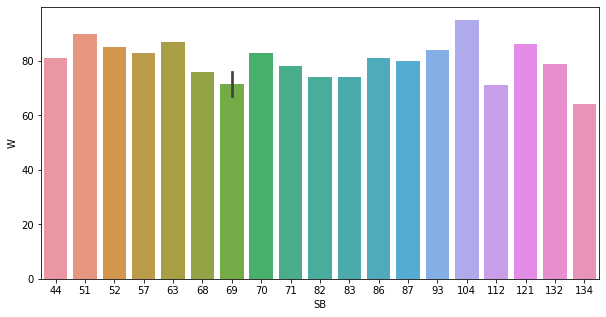

In [42]:
# Checking SB with W

plot = plt.figure(figsize = (10,5))
sns.barplot(x= 'SB', y= 'W', data = A)
plt.show()

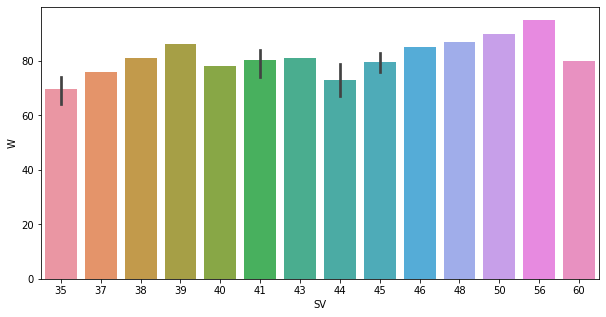

In [43]:
# # Checking SV with W

plot = plt.figure(figsize = (10,5))
sns.barplot(x= 'SV', y= 'W', data = A)
plt.show()

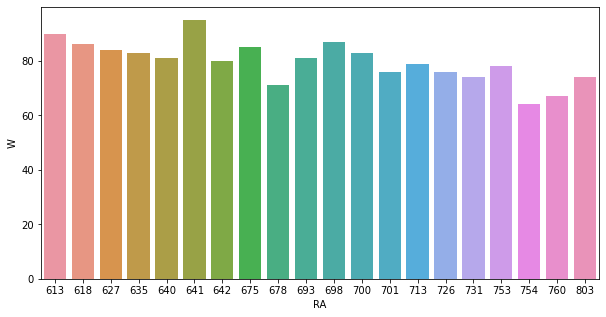

In [44]:
# Checking RA with W

plot = plt.figure(figsize = (10,5))
sns.barplot(x= 'RA', y= 'W', data = A)
plt.show()

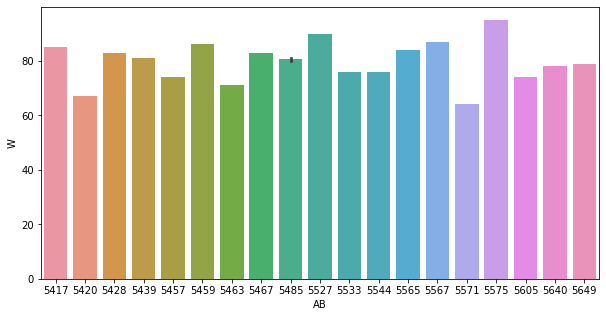

In [45]:
# Checking AB with W

plot = plt.figure(figsize = (10,5))
sns.barplot(x= 'AB', y= 'W', data = A)
plt.show()

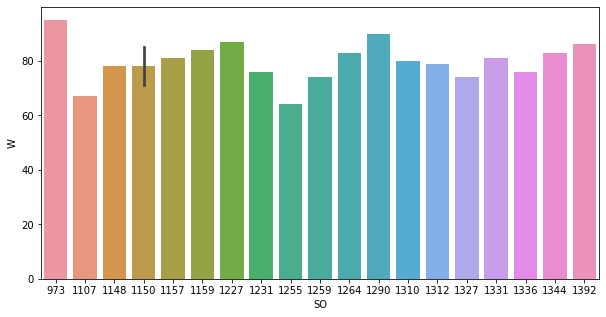

In [46]:
# Checking SO with W


plot = plt.figure(figsize = (10,5))
sns.barplot(x= 'SO', y= 'W', data = A)
plt.show()

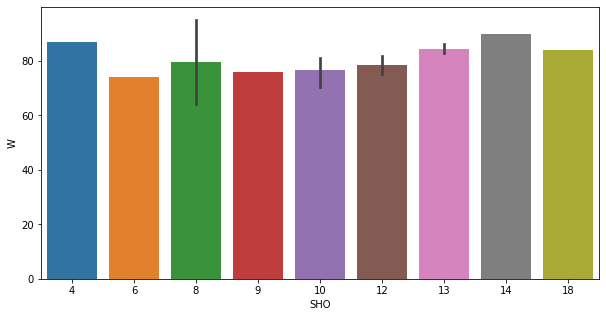

In [47]:
# Checking SHO with W


plot = plt.figure(figsize = (10,5))
sns.barplot(x= 'SHO', y= 'W', data = A)
plt.show()

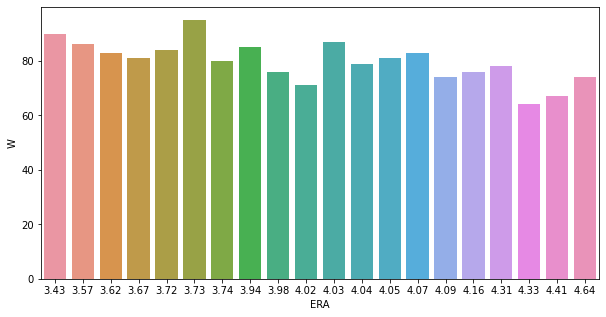

In [48]:
# Checking ERA with W

plot = plt.figure(figsize = (10,5))
sns.barplot(x= 'ERA', y= 'W', data = A)
plt.show()

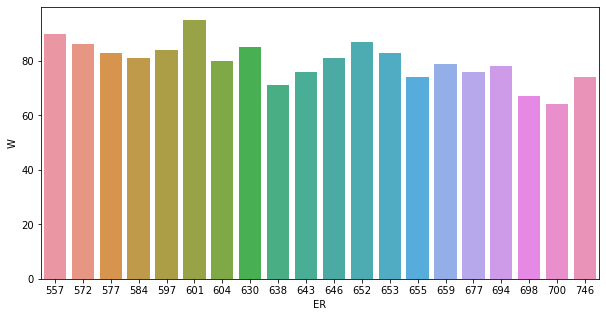

In [49]:
# Checking ER with W

plot = plt.figure(figsize = (10,5))
sns.barplot(x= 'ER', y= 'W', data = A)
plt.show()

### Observation
1. First graph shows as runs increase w score also increase, even if there is some fluctuations in our data it doesn't affect much.
2. Even if feature AB, SO, SHO, E and SB changes there is not much change in win score.
3. SV have positive correction, as SV value increases win score increase.
4. Where value of ER, RA and ERA gets reducing W score increase, these have inverse relation with win score.
5. Now lets see correlation of each variable using heatmap

In [50]:
# Using correlations function
correlation = new_baseball.corr()

<AxesSubplot:>

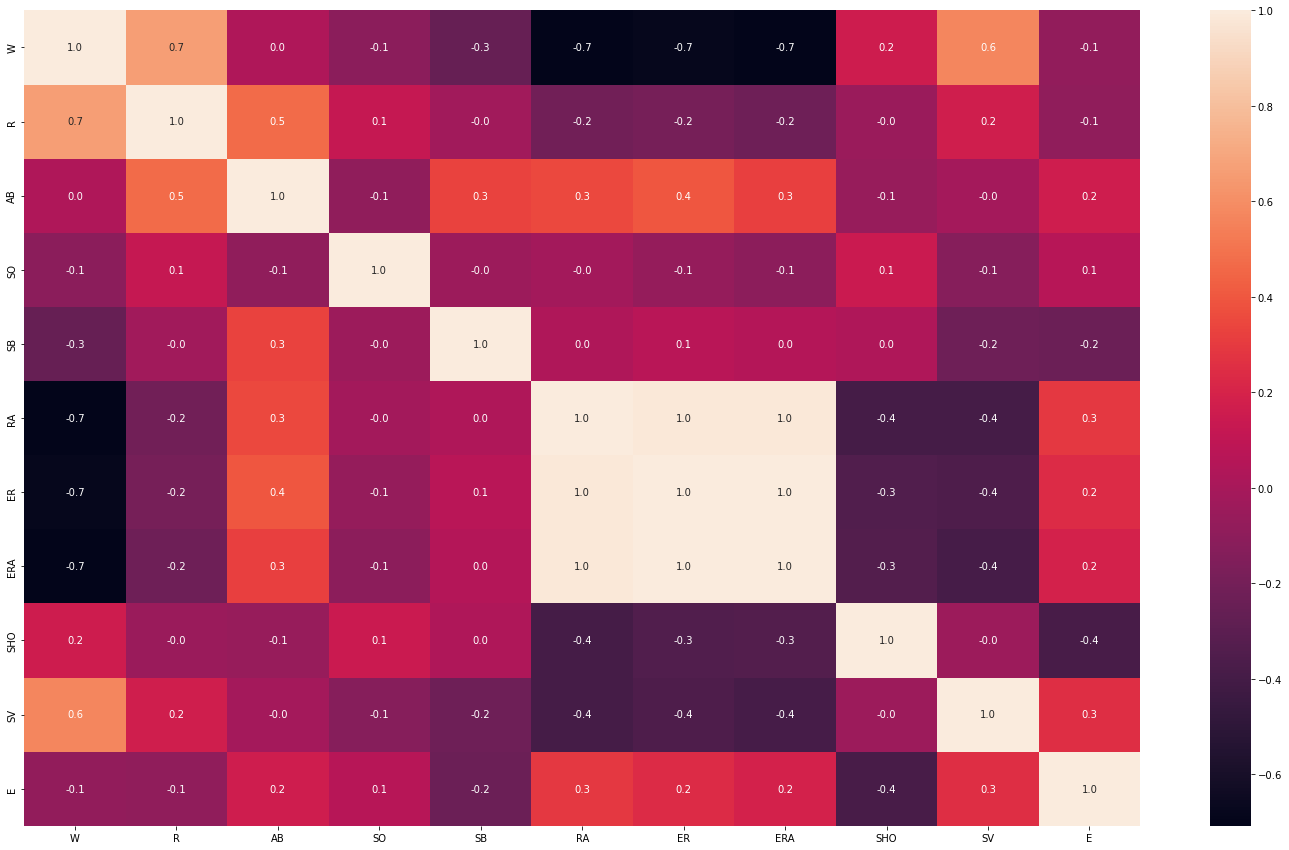

In [51]:
# Checking correlation of columns using heatmap

plt.figure (figsize = (25,15))
sns.heatmap (correlation, fmt = '.1f', annot = True)

### To easy this we can covert this into bar plot.

<AxesSubplot:>

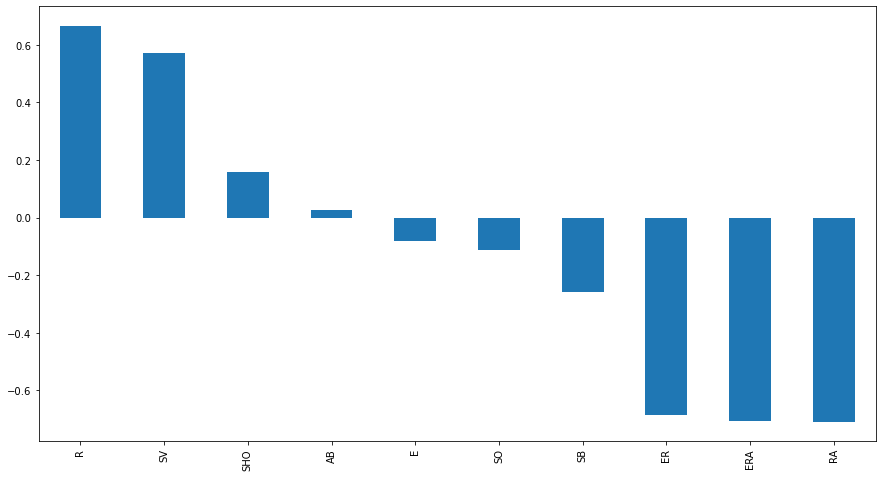

In [52]:
plt.figure(figsize = (15,8))
new_baseball.corr()['W'].sort_values(ascending=False).drop(['W']).plot.bar()

OBSERVATION

1. R,SV, SHO, AB have psotive correlation with our target column W.
2. Simultaneously columns E, SO, SB, ER, ERA and RA are inversly propopotion to our target columns.

### Spliting data into training and testing data (X and Y)

In [53]:
X = new_baseball.drop(columns='W', axis = 1)
Y = new_baseball ['W']
print (X)

      R    AB    SO   SB   RA   ER   ERA  SHO  SV    E
0   724  5575   973  104  641  601  3.73    8  56   88
1   696  5467  1264   70  700  653  4.07   12  45   86
2   669  5439  1157   86  640  584  3.67   10  38   79
3   622  5533  1231   68  701  643  3.98    9  37  101
4   689  5605  1259   83  803  746  4.64   12  35   86
5   764  5567  1227   63  698  652  4.03    4  48   93
6   713  5485  1331   44  693  646  4.05   10  43   77
7   644  5485  1310   87  642  604  3.74   12  60   95
8   748  5640  1148   71  753  694  4.31   10  40   97
9   729  5459  1392  121  618  572  3.57   13  39   85
10  661  5417  1150   52  675  630  3.94   12  46   93
11  656  5544  1336   69  726  677  4.16   12  45   94
12  640  5571  1255  134  754  700  4.33    8  35   90
13  683  5527  1290   51  613  557  3.43   14  50   88
14  703  5428  1344   57  635  577  3.62   13  41   90
15  613  5463  1150  112  678  638  4.02   12  35   77
16  573  5420  1107   69  760  698  4.41   10  44   90
17  696  5

In [54]:
print (Y)

0     95
1     83
2     81
3     76
4     74
5     87
6     81
7     80
8     78
9     86
10    85
11    76
12    64
13    90
14    83
15    71
16    67
17    84
18    79
19    74
Name: W, dtype: int64


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.1, random_state = 2)

In [56]:
# checking count of train and test data

print (X.shape, X_train.shape, X_test.shape)

(20, 10) (18, 10) (2, 10)


# Model Selection

### Linear Regression

In [57]:
# Calling LinearRegression

regressor = LinearRegression ()

In [58]:
# Assigning LinearRegression to x and y train

regressor.fit(X_train, Y_train)

LinearRegression()

In [59]:
#  Checking test data, our train data is bit smaller

test_data_prediction = regressor.predict(X_test)

R Square Value

In [60]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print ('R Squared value: ', r2_test)

R Squared value:  -0.2059987291601706


In [61]:
training_data_prediction = regressor.predict(X_train)

In [62]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print ('========================================')
print ('R Squared value: ', r2_train)
print ('========================================')

R Squared value:  0.9606261670883607


R-Squre values is nearly 96% for training data, further we will check Random Forest

### Random Forest

In [63]:
# Model Training (Random forest)
model = RandomForestClassifier ()
model.fit (X_train, Y_train)

RandomForestClassifier()

In [64]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score (X_test_prediction, Y_test)
print ('Accuracy = ', test_data_accuracy)

Accuracy =  0.0


In [65]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score (X_train_prediction, Y_train)
print ('========================================')
print ('Accuracy = ', train_data_accuracy)
print ('========================================')

Accuracy =  1.0


Random Forest gives nearly 100% accuracy to our model which we can use, however need to check Logistic Regression also.

### Logistic Regression

In [66]:
log_model = LogisticRegression()

In [67]:
log_model.fit(X_train, Y_train)

LogisticRegression()

In [68]:

X_train_prediction = log_model.predict(X_train)
print (X_train_prediction)

[79 95 86 87 76 85 83 84 80 67 83 81 76 81 74 90 71 78]


In [69]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print ('===================================================')
print ('Accuracy Score of Training Data = ', training_data_accuracy)
print ('===================================================')

Accuracy Score of Training Data =  1.0


Same with logestic regression, this also give nearly 100% accuracy from which we can predict the run socred

### Creating model using Random Forest

In [70]:
input_data = (696, 5467, 1264, 70, 700, 653, 4.07,  12, 45,  86)

# changing the input data to a numpy arrary

input_data_as_numpy_array = np.asarray(input_data)

# reshaping the data as we are prediting the lable for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict (input_data_reshaped)
print (prediction)

[83]


### Creating model using Logistic Regression

In [71]:
# Taking data of columns to check survival chances of a person

input_data = (696, 5467, 1264, 70, 700, 653, 4.07,  12, 45,  86)

# Changing input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the arrary

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 
# We want value for 1 particular data point this is why reshaped to (1,-1)


prediction2 = log_model.predict (input_data_reshaped)
print (prediction2)

[83]


Observation
1. Of all above model, Logestic Regression and Random forest gives the best score.
2. We have created above model which predict runs prediction with nearly 100% using Random Forest and Logestic Regression.
3. Our data is small so might be this is the reason our test data was '0' in all the cases.
4. We are now able to predit umber of predicted wins with nearly 100% accuracy (W)

### Saving model

In [72]:
import joblib

In [73]:
joblib.dump(model.predict,'Baseball.obj')

['Baseball.obj']